In [ ]:
# carregando as bibliotecas que serão utilizadas

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import pylab as pl
import seaborn as sns
import os

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score

from keras.utils import to_categorical
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
root_path = 'gdrive/My Drive/SelecaoAIBox/'

In [ ]:
# função para carregar os dados de uma pasta e adicionar a classe
def load_files(path, class_num):
  
  data = pd.DataFrame()
  new_path = sorted(os.listdir(path), key=lambda x: int("".join([i for i in x if i.isdigit()])))

  for i,doc in enumerate(new_path):
    data_aux = pd.read_csv(path + doc)

    # criando coluna de classe para cada df
    data_aux['class'] = class_num
    data_aux['code'] = i + 1
  

    data = pd.concat([data,data_aux])
  
  return data


In [ ]:
# Carregando a base de dados e adicionando a coluna de classes

# classe 1 - dws (Downstairs)
df_d1 = load_files(root_path+'data/dws_1/', 0)
df_d2 = load_files(root_path+'data/dws_2/', 0)
df_d11 = load_files(root_path+'data/dws_11/',0)

# classe 2 - ups (Upstairs)
df_u3 = load_files(root_path+'data/ups_3/', 1)
df_u4 = load_files(root_path+'data/ups_4/', 1)
df_u12 = load_files(root_path+'data/ups_12/', 1)

# classe 3 - sit (Sitting)
df_si5 = load_files(root_path+'data/sit_5/', 2)
df_si13 = load_files(root_path+'data/sit_13/', 2)

# classe 4 - std (Standing)
df_st6 = load_files(root_path+'data/std_6/', 3)
df_st14 = load_files(root_path+'data/std_14/', 3)

# classe 5 - wlk (Walking)
df_w7 = load_files(root_path+'data/wlk_7/', 4)
df_w8 = load_files(root_path+'data/wlk_8/', 4)
df_w15 = load_files(root_path+'data/wlk_15/', 4)

# classe 6 - jog (Jogging)
df_j9 = load_files(root_path+'data/jog_9/', 5)
df_j16 = load_files(root_path+'data/jog_16/',5)

# criar colunas para categorizar os dados de acordo com o tempo da atividade

# 1 - long trials (pastas de 1 a 9)
lista_long_trials = [ df_d1, df_d2, df_u3, df_u4, df_si5, df_st6, df_w7, 
                     df_w8, df_j9]

# criando dataframe com todos os dados de long trials
df_longs = pd.concat(lista_long_trials)

# adicionando coluna para identificar o tipo de atividade
df_longs['trial'] = 1 # 1 para long 

# 2 - short trials (pastas de 11 a 16)
lista_short_trials = [ df_d11, df_u12, df_si13, df_st14, df_w15, df_j16]

# dataframe para short trials
df_shorts = pd.concat(lista_short_trials)

# adicionando a coluna de atividade
df_shorts['trial'] = 2 # 2 para short


# dataframe concatenando os dados de todas as classes
lista_dfs = [df_d1, df_d2, df_u3, df_u4, df_si5, df_st6, df_w7,df_w8, df_j9,
             df_d11, df_u12, df_si13, df_st14, df_w15, df_j16 ]
             
df_all = pd.concat(lista_dfs)


In [ ]:
df_teste = df_j16.iloc[:, 1:12]


In [ ]:
df_teste.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y
0,2.135357,-1.138555,1.678900,0.353903,0.908029,0.224134,-0.255821,0.499133,-0.725292,0.778940,0.051810
1,2.162745,-1.152928,1.739330,0.336766,0.913956,0.226435,-1.015571,-1.724624,-1.266134,0.613780,-0.112152
2,2.175561,-1.166584,1.770651,0.323538,0.919413,0.223615,0.784464,-0.237245,-0.759811,0.413660,-0.630365
3,2.105621,-1.194708,1.696332,0.315997,0.930108,0.187202,2.235062,-0.180857,-0.135523,0.372556,-0.915796
4,2.021151,-1.202365,1.626949,0.324243,0.932893,0.156769,0.528382,-1.351467,0.512080,0.139503,-1.002214


# Análise descritiva dos dados
Base de dados utilizada disponível no [kaggle](https://www.kaggle.com/malekzadeh/motionsense-dataset/data#) 

In [ ]:
# Informações sobre os participantes do experimento

df_info = pd.read_csv(root_path + 'data_subjects_info.csv')
df_info.set_index('code', inplace = True)

In [ ]:
df_all = pd.merge(df_all, df_info, left_on = 'code', right_on = 'code')
del df_all['Unnamed: 0']
df_all.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,class,code,weight,height,age,gender
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,0,1,102,188,46,1
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,0,1,102,188,46,1
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,0,1,102,188,46,1
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,0,1,102,188,46,1
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,0,1,102,188,46,1


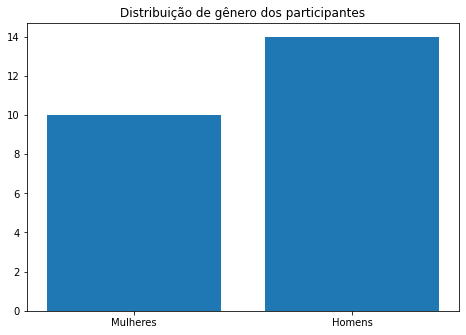

In [ ]:
# distribuição dos participantes por gênero

num_homens = df_info['gender'].sum()
num_mulheres = len(df_info) - num_homens
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ['Mulheres', 'Homens']
genero = [num_mulheres, num_homens]
plt.title('Distribuição de gênero dos participantes')
ax.bar(label,genero)
plt.show()

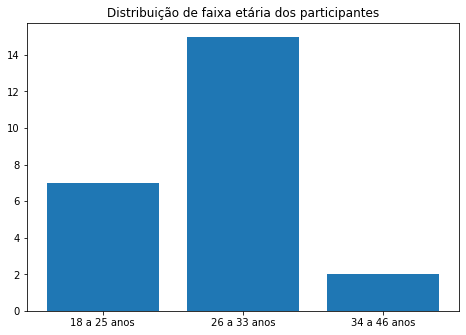

In [ ]:
# distribuição por faixa etária

f1 = len(df_info[(df_info['age'] >= 18) & (df_info['age'] <= 25)])
f2 = len(df_info[(df_info['age'] >= 26) & (df_info['age'] <= 33)])
f3 = len(df_info[(df_info['age'] >= 34) & (df_info['age'] <= 46)])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ['18 a 25 anos', '26 a 33 anos','34 a 46 anos']
idades = [f1, f2, f3]
plt.title('Distribuição de faixa etária dos participantes')
ax.bar(label,idades)
plt.show()


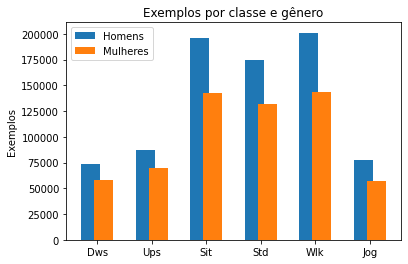

In [ ]:
# distribuição das classes no dataframe de acordo com o gênero
men_dws = len(df_all[(df_all['class'] == 0) & (df_all['gender'] == 1)])
wo_dws = len(df_all[(df_all['class'] == 0) & (df_all['gender'] == 0)])

men_ups = len(df_all[(df_all['class'] == 1) & (df_all['gender'] == 1)])
wo_ups = len(df_all[(df_all['class'] == 1) & (df_all['gender'] == 0)])

men_sit = len(df_all[(df_all['class'] == 2) & (df_all['gender'] == 1)])
wo_sit = len(df_all[(df_all['class'] == 2) & (df_all['gender'] == 0)])

men_std = len(df_all[(df_all['class'] == 3) & (df_all['gender'] == 1)])
wo_std = len(df_all[(df_all['class'] == 3) & (df_all['gender'] == 0)])

men_wlk = len(df_all[(df_all['class'] == 4) & (df_all['gender'] == 1)])
wo_wlk = len(df_all[(df_all['class'] == 4) & (df_all['gender'] == 0)])

men_jog = len(df_all[(df_all['class'] == 5) & (df_all['gender'] == 1)])
wo_jog = len(df_all[(df_all['class'] == 5) & (df_all['gender'] == 0)])

labels = ['Dws', 'Ups', 'Sit', 'Std', 'Wlk', 'Jog']
women_total = [wo_dws, wo_ups, wo_sit, wo_std, wo_wlk, wo_jog ]
men_total = [ men_dws, men_ups, men_sit, men_std, men_wlk, men_jog]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/3, men_total, width, label='Homens')
rects2 = ax.bar(x + width/3, women_total, width, label='Mulheres')




ax.set_ylabel('Exemplos')
ax.set_title('Exemplos por classe e gênero')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

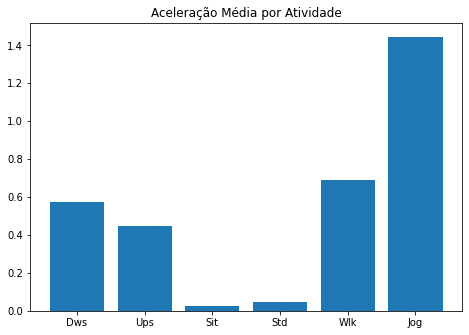

In [ ]:
# aceleração média por atividade
df_all['acctotal'] = np.sqrt(np.square(df_all['userAcceleration.x']) + np.square(df_all['userAcceleration.y']) + np.square(df_all['userAcceleration.z']))

ativ_1 = df_all[df_all['class'] == 0]
ac_1 = ativ_1['acctotal'].sum() / len(ativ_1)

ativ_2 = df_all[df_all['class'] == 1]
ac_2 = ativ_2['acctotal'].sum() / len(ativ_2)

ativ_3 = df_all[df_all['class'] == 2]
ac_3 = ativ_3['acctotal'].sum() / len(ativ_3)

ativ_4 = df_all[df_all['class'] == 3]
ac_4 = ativ_4['acctotal'].sum() / len(ativ_4)

ativ_5 = df_all[df_all['class'] == 4]
ac_5 = ativ_5['acctotal'].sum() / len(ativ_5)

ativ_6 = df_all[df_all['class'] == 5]
ac_6 = ativ_6['acctotal'].sum() / len(ativ_6)



fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ['Dws', 'Ups', 'Sit', 'Std', 'Wlk', 'Jog']
idades = [ac_1, ac_2, ac_3, ac_4, ac_5, ac_6]
plt.title('Aceleração Média por Atividade')
ax.bar(label,idades)
plt.show()

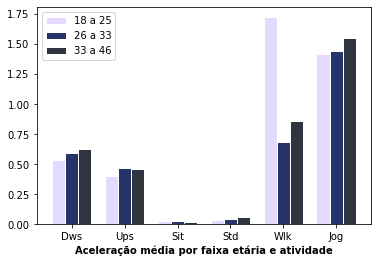

In [ ]:
# aceleração média por idade e atividade corrida
df_all['acctotal'] = np.sqrt(np.square(df_all['userAcceleration.x']) + np.square(df_all['userAcceleration.y']) + np.square(df_all['userAcceleration.z']))

# grupo etario 1
ativ_15 = df_all[(df_all['age'] >= 18) & (df_all['age'] <= 25) & (df_all['class'] == 5) ]
g1_5 = ativ_15['acctotal'].sum() / len(ativ_15)

ativ_14 = df_all[(df_all['age'] >= 18) & (df_all['age'] <= 25) & (df_all['class'] == 4) ]
g1_4 = ativ_14['acctotal'].sum() / len(ativ_15)

ativ_13 = df_all[(df_all['age'] >= 18) & (df_all['age'] <= 25) & (df_all['class'] == 3) ]
g1_3 = ativ_13['acctotal'].sum() / len(ativ_13)

ativ_12 = df_all[(df_all['age'] >= 18) & (df_all['age'] <= 25) & (df_all['class'] == 2) ]
g1_2 = ativ_12['acctotal'].sum() / len(ativ_12)

ativ_11 = df_all[(df_all['age'] >= 18) & (df_all['age'] <= 25) & (df_all['class'] == 1) ]
g1_1 = ativ_11['acctotal'].sum() / len(ativ_11)

ativ_10 = df_all[(df_all['age'] >= 18) & (df_all['age'] <= 25) & (df_all['class'] == 0) ]
g1_0 = ativ_10['acctotal'].sum() / len(ativ_10)

# grupo etario 2
ativ_25 = df_all[(df_all['age'] >= 26) & (df_all['age'] <= 33) & (df_all['class'] == 5) ]
g2_5 = ativ_25['acctotal'].sum() / len(ativ_25)

ativ_24 = df_all[(df_all['age'] >=26) & (df_all['age'] <=33) & (df_all['class'] == 4) ]
g2_4 = ativ_24['acctotal'].sum() / len(ativ_24)

ativ_23 = df_all[(df_all['age'] >= 26) & (df_all['age'] <= 33) & (df_all['class'] == 3) ]
g2_3 = ativ_23['acctotal'].sum() / len(ativ_23)

ativ_22 = df_all[(df_all['age'] >= 26) & (df_all['age'] <= 33) & (df_all['class'] == 2) ]
g2_2 = ativ_22['acctotal'].sum() / len(ativ_22)

ativ_21 = df_all[(df_all['age'] >= 26) & (df_all['age'] <= 33) & (df_all['class'] == 1) ]
g2_1 = ativ_21['acctotal'].sum() / len(ativ_21)

ativ_20 = df_all[(df_all['age'] >= 26) & (df_all['age'] <= 33) & (df_all['class'] == 0) ]
g2_0 = ativ_20['acctotal'].sum() / len(ativ_20)

# grupo etario 3
ativ_35 = df_all[(df_all['age'] >=34) & (df_all['age'] <=46) & (df_all['class'] == 5) ]
g3_5 = ativ_35['acctotal'].sum() / len(ativ_35)

ativ_34 = df_all[(df_all['age'] >=34) & (df_all['age'] <=46) & (df_all['class'] == 4) ]
g3_4 = ativ_34['acctotal'].sum() / len(ativ_34)

ativ_33 = df_all[(df_all['age'] >= 34) & (df_all['age'] <= 46) & (df_all['class'] == 3) ]
g3_3 = ativ_33['acctotal'].sum() / len(ativ_33)

ativ_32 = df_all[(df_all['age'] >= 34) & (df_all['age'] <= 46) & (df_all['class'] == 2) ]
g3_2 = ativ_32['acctotal'].sum() / len(ativ_32)

ativ_31 = df_all[(df_all['age'] >= 34) & (df_all['age'] <= 46) & (df_all['class'] == 1) ]
g3_1 = ativ_31['acctotal'].sum() / len(ativ_31)

ativ_30 = df_all[(df_all['age'] >= 34) & (df_all['age'] <= 46) & (df_all['class'] == 0) ]
g3_0 = ativ_30['acctotal'].sum() / len(ativ_30)

barWidth = 0.25

bars1 = [g1_0, g1_1, g1_2, g1_3, g1_4, g1_5 ]
bars2 = [ g2_0, g2_1, g2_2,g2_3, g2_4, g2_5]
bars3 = [g3_0, g3_1, g3_2, g3_3, g3_4, g3_5]

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#E4D9FF', width=barWidth, edgecolor='white', label='18 a 25')
plt.bar(r2, bars2, color='#273469', width=barWidth, edgecolor='white', label='26 a 33')
plt.bar(r3, bars3, color='#30343F', width=barWidth, edgecolor='white', label='33 a 46')
 
# Add xticks on the middle of the group bars
plt.xlabel('Aceleração média por faixa etária e atividade', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))],['Dws', 'Ups', 'Sit', 'Std', 'Wlk', 'Jog'] )


 
# Create legend & Show graphic
plt.legend()
plt.show()


# Agrupamento feito pelo K-means
Utilizando PCA para plotar o gráfico dos grupos formados pelo K-means
utilizando as duas principais features 

In [ ]:
array_kmeans = np.array(df_all)
array_kmeans = array_kmeans[:,0:12]
df_kmeans = pd.DataFrame(array_kmeans)
df_kmeans.head()

pca = PCA(n_components=2).fit(df_kmeans)
pca_2d = pca.transform(df_kmeans)

# Usando o K-Means
k = 6
kmeans = KMeans(n_clusters=k,random_state=0)
kmeans.fit(df_kmeans)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

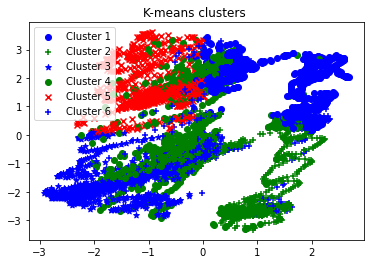

In [ ]:
# plotando o gráfico utilizando 6000 exemplos da base de dados


for i in range(0, 6000):

  if kmeans.labels_[i] == 0:
    c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',
    marker='o')
  elif kmeans.labels_[i] == 1:
    c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',
    marker='+')
  elif kmeans.labels_[i] == 2:
    c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',
    marker='*')

  elif kmeans.labels_[i] == 3:
    c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',
    marker='o')

  elif kmeans.labels_[i] == 4:
    c5 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',
    marker='x')

  elif kmeans.labels_[i] == 5:
    c6 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',
    marker='+') 

pl.legend([c1, c2, c3, c4, c5, c6],['Cluster 1', 'Cluster 2','Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6'])

pl.title('K-means clusters ')
pl.show()


#Classificação usando Deep Learning

In [ ]:
array_all = np.array(df_all)

# Removendo as colunas de classe do dataframe
array_all_noclass = array_all[:, 0:12]

# Criando um dataframe apenas com as classes
all_class = array_all[:,]

In [ ]:
# dividindo a base de dados em treino e teste
noclass_train, noclass_test, class_train, class_test = train_test_split(array_all_noclass, all_class, test_size=0.02)

# transformando os dados para a forma de one hot encoding
class_train_categorical = keras.utils.to_categorical(class_train, num_classes=6)
class_test_categorical = keras.utils.to_categorical(class_test, num_classes=6)

# criando a arquitetura da rede
modelo = Sequential()
modelo.add(Dense(units=200, activation='relu',kernel_initializer='random_uniform', input_dim=array_all_noclass.shape[1]))
modelo.add(Dense(units=200, activation='relu',kernel_initializer='random_uniform'))
modelo.add(Dense(units=200, activation='relu',kernel_initializer='random_uniform'))
modelo.add(Dense(units=200, activation='relu',kernel_initializer='random_uniform'))
modelo.add(Dense(units=6, activation='softmax'))

# configurando o otimizador
optimizer = keras.optimizers.Adam(lr = 0.001, decay =0.0001, clipvalue= 0.5)
modelo.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


modelo.fit(noclass_train, class_train_categorical,validation_data=(noclass_test, class_test_categorical),batch_size=256, epochs=15)

pesos0 =  modelo.layers[0].get_weights()
previsoes = modelo.predict(noclass_test)

Epoch 1/15
5409/5409 [==============================] - 41s 8ms/step - loss: 0.4450 - accuracy: 0.8298 - val_loss: 0.3481 - val_accuracy: 0.8735
Epoch 2/15
5409/5409 [==============================] - 41s 8ms/step - loss: 0.3309 - accuracy: 0.8789 - val_loss: 0.3057 - val_accuracy: 0.8894
Epoch 3/15
5409/5409 [==============================] - 41s 8ms/step - loss: 0.2936 - accuracy: 0.8937 - val_loss: 0.2802 - val_accuracy: 0.8984
Epoch 4/15
5409/5409 [==============================] - 42s 8ms/step - loss: 0.2715 - accuracy: 0.9024 - val_loss: 0.2610 - val_accuracy: 0.9060
Epoch 5/15
5409/5409 [==============================] - 41s 8ms/step - loss: 0.2560 - accuracy: 0.9082 - val_loss: 0.2492 - val_accuracy: 0.9122
Epoch 6/15
5409/5409 [==============================] - 42s 8ms/step - loss: 0.2442 - accuracy: 0.9127 - val_loss: 0.2444 - val_accuracy: 0.9130
Epoch 7/15
5409/5409 [==============================] - 44s 8ms/step - loss: 0.2353 - accuracy: 0.9160 - val_loss: 0.2364 - val_ac

In [ ]:
# Resultados da classificação no conjunto de teste

a = [np.argmax(pred) for pred in modelo.predict(noclass_test)]
recall = recall_score(class_test, a, average='macro')
fscore = f1_score(class_test, a, average='macro')
precision = precision_score(class_test, a, average='macro')
accuracy = accuracy_score(class_test, a)

print('Recall ', recall)
print('F-score ', fscore)
print('Precision ', precision)
print('Accuracy ', accuracy)


Recall  0.8942705197458607
F-score  0.8963082133434046
Precision  0.8986356878768844
Accuracy  0.9248354448297827
